In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [91]:

seaborn.__version__

'0.9.0'


## Engine + Api Mock 
---

### RestTemplate

RestTemplate creates new Httpconnection every time and closes the connection once done.


```
@Bean(name = "apiRestTemplate")
    public RestTemplate apiRestTemplate() {
        HttpComponentsClientHttpRequestFactory requestFactory = new HttpComponentsClientHttpRequestFactory();
        return new RestTemplate(requestFactory);
    }

```



### Pooling connection manager

PoolingHttpClientConnectionManager is a more complex implementation that manages a pool of client connections and is able to service connection requests from multiple execution threads. Connections are pooled on a per route basis. A request for a route for which the manager already has a persistent connection available in the pool will be serviced by leasing a connection from the pool rather than creating a brand new connection.


PoolingHttpClientConnectionManager maintains a maximum limit of connections on a per route basis and in total. Per default this implementation will create no more than 2 concurrent connections per given route and no more 20 connections in total. For many real-world applications these limits may prove too constraining, especially if they use HTTP as a transport protocol for their services.



```
  @Bean
    public PoolingHttpClientConnectionManager poolingHttpClientConnectionManager() {
        PoolingHttpClientConnectionManager result = new PoolingHttpClientConnectionManager();
        result.setMaxTotal(200);
        result.setDefaultMaxPerRoute(10);
        return result;
    }

    @Bean
    public CloseableHttpClient httpClient(PoolingHttpClientConnectionManager poolingHttpClientConnectionManager) {
        CloseableHttpClient result = HttpClients
                .custom()
                .setConnectionManager(poolingHttpClientConnectionManager)
                .build();
        return result;
    }

    @Bean
    public HttpComponentsClientHttpRequestFactory clientHttpRequestFactory(HttpClient httpClient) {
        HttpComponentsClientHttpRequestFactory clientHttpRequestFactory = new HttpComponentsClientHttpRequestFactory();
        clientHttpRequestFactory.setHttpClient(httpClient);
        return clientHttpRequestFactory;
    }

    @Bean(name = "apiRestTemplate")
    public RestTemplate apiRestTemplate(HttpComponentsClientHttpRequestFactory clientHttpRequestFactory) {
        return new RestTemplate(clientHttpRequestFactory);
    }
```

**Reference**


---

**20_10**

* MaxTotal: 20
* DefaultMaxPerRoute: 10

---

**20_20**
* MaxTotal: 20
* DefaultMaxPerRoute: 20

---
**20_50**
* MaxTotal: 20
* DefaultMaxPerRoute: 50

---
**master**
* Rest template without pooling (current Engine Configuration)

## 1-Test:  50 Threads for 60 seconds

In [0]:
dataset_engine = pandas.read_csv('engine_api_mock.csv')


---
###PoolingHttpClientConnectionManager configuration:
* MaxTotal:  20
* DefaultMaxPerRoute: Variable

---



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


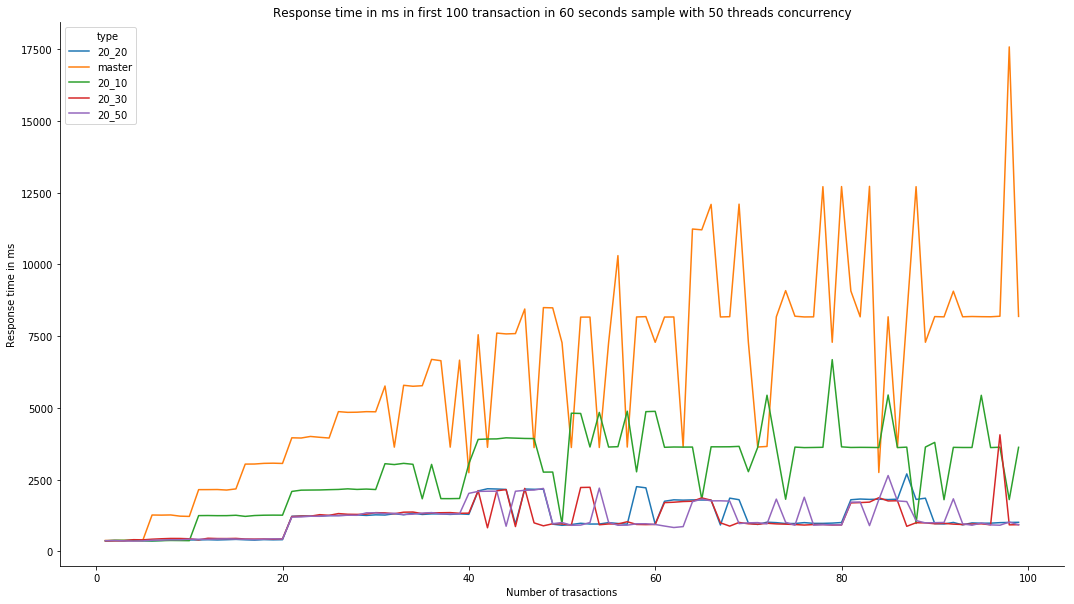

In [93]:
type_list = ['20_10','20_20','20_30','20_50', 'master']
dataset_50 = dataset_engine[dataset_engine['type'].isin(type_list)][dataset_engine['threads']==50][dataset_engine['number']<100]
dataset_50["elapsed"] = dataset_50["elapsed"].apply(lambda x: x - 900)
plt.figure(figsize=(18,10))
seaborn.lineplot(data=dataset_50, x='number', y='elapsed', hue='type')
plt.title('Response time in ms in first 100 transaction in 60 seconds sample with 50 threads concurrency')
plt.xlabel('Number of trasactions')
plt.ylabel('Response time in ms')
seaborn.despine()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


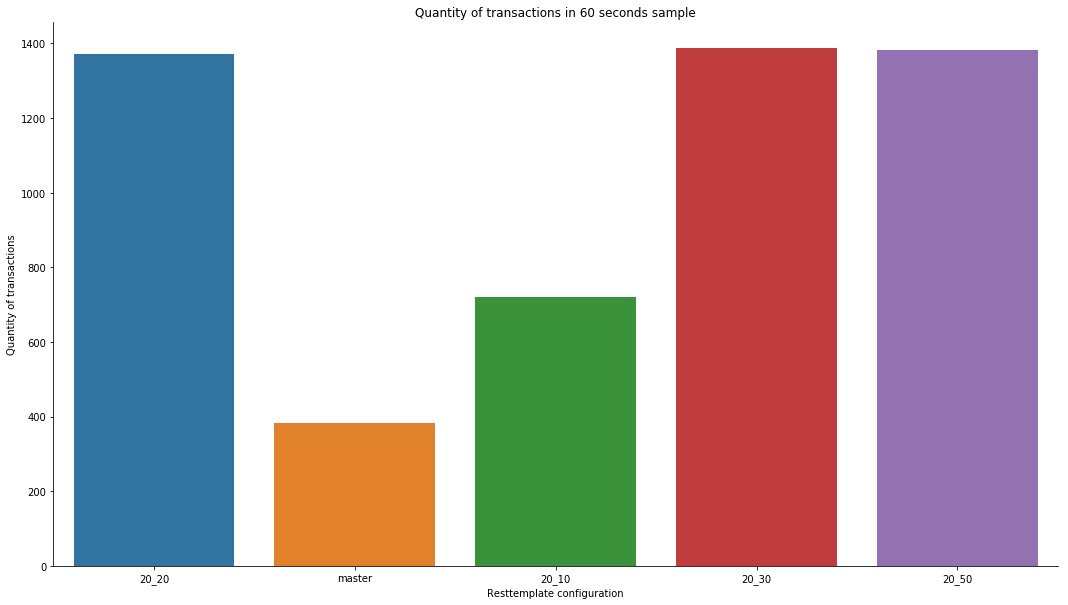

In [94]:
type_list = ['20_10','20_20','20_30','20_50', 'master']
dataset_50 = dataset_engine[dataset_engine['type'].isin(type_list)][dataset_engine['threads']==50]
dataset_50["elapsed"] = dataset_50["elapsed"].apply(lambda x: x - 900)
plt.figure(figsize=(18,10))
seaborn.countplot(data=dataset_50, x='type')
plt.title('Quantity of transactions in 60 seconds sample')
plt.xlabel('Resttemplate configuration')
plt.ylabel('Quantity of transactions')
seaborn.despine()

---
###PoolingHttpClientConnectionManager configuration:
* MaxTotal:  Variable
* DefaultMaxPerRoute: 10

---

**Reference**


---

**10_10**

* MaxTotal: 10
* DefaultMaxPerRoute: 10

---
**20_10**
* MaxTotal: 20
* DefaultMaxPerRoute: 10
---

**200_10**
* MaxTotal: 200
* DefaultMaxPerRoute: 10
---
**master**
* Rest template without pooling (current Engine Configuration)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


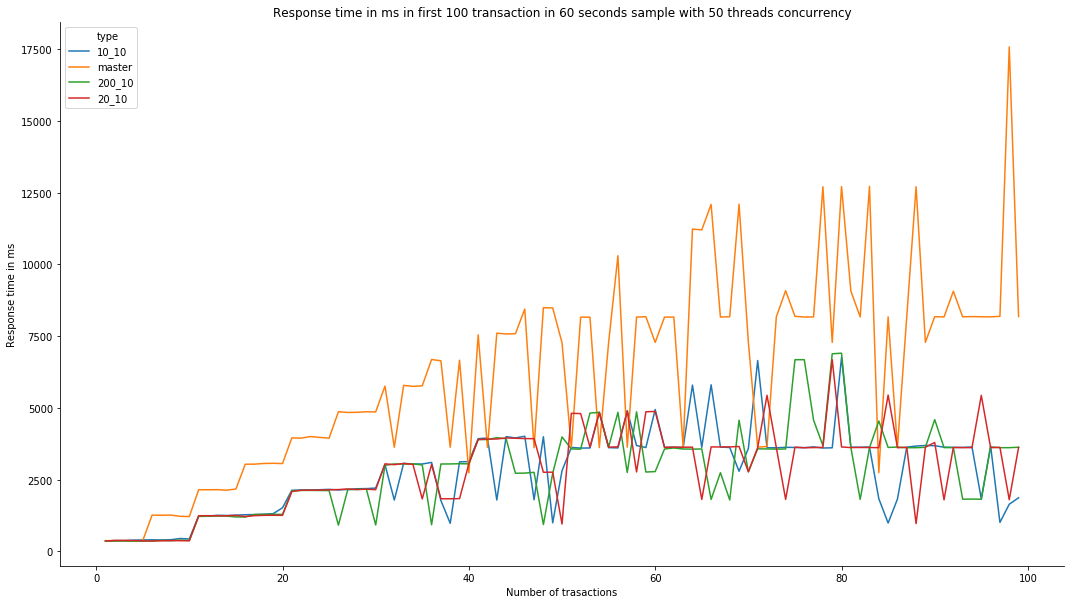

In [95]:
type_list = ['10_10','200_10', '20_10', 'master']
dataset_50 = dataset_engine[dataset_engine['type'].isin(type_list)][dataset_engine['threads']==50][dataset_engine['number']<100]
dataset_50["elapsed"] = dataset_50["elapsed"].apply(lambda x: x - 900)
plt.figure(figsize=(18,10))
seaborn.lineplot(data=dataset_50, x='number', y='elapsed', hue='type')
plt.title('Response time in ms in first 100 transaction in 60 seconds sample with 50 threads concurrency')
plt.xlabel('Number of trasactions')
plt.ylabel('Response time in ms')
seaborn.despine()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


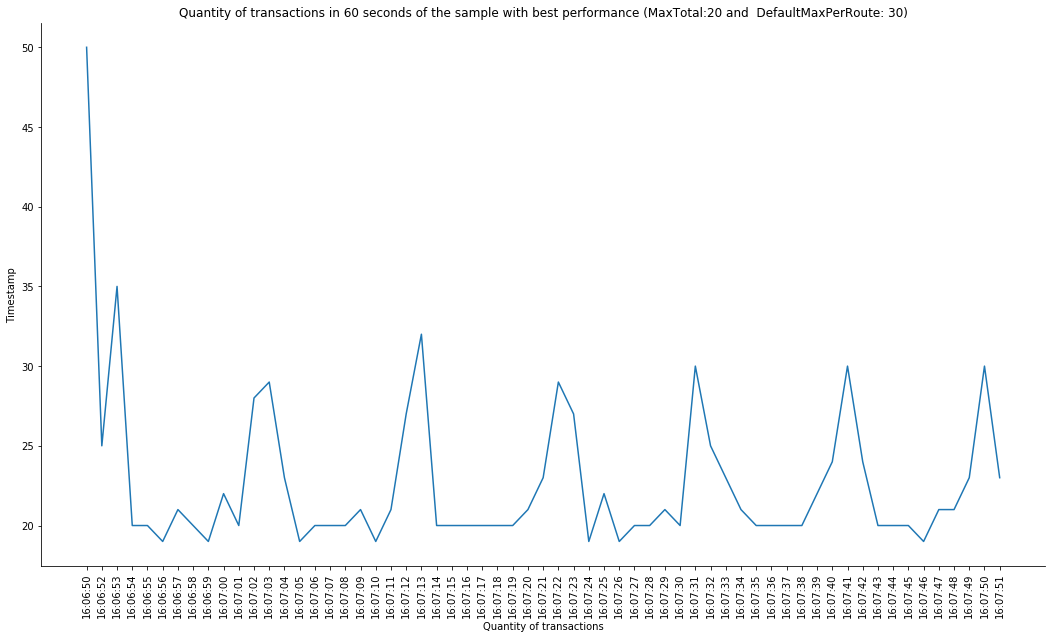

In [96]:
type_list = [ '20_30']
dataset_50 = dataset_engine[dataset_engine['type'].isin(type_list)][dataset_engine['threads']==50]
count_dataset = dataset_50['timeStamp'].value_counts().reset_index()
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
seaborn.lineplot(data=dataset_50, x=count_dataset['index'], y=count_dataset['timeStamp'])
plt.title('Quantity of transactions in 60 seconds of the sample with best performance (MaxTotal:20 and  DefaultMaxPerRoute: 30)')
plt.xlabel('Quantity of transactions')
plt.ylabel('Timestamp')
seaborn.despine()

## 2-Test:  30 Threads for 60 seconds

---
###PoolingHttpClientConnectionManager configuration:
* MaxTotal:  20
* DefaultMaxPerRoute: Variable

---

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


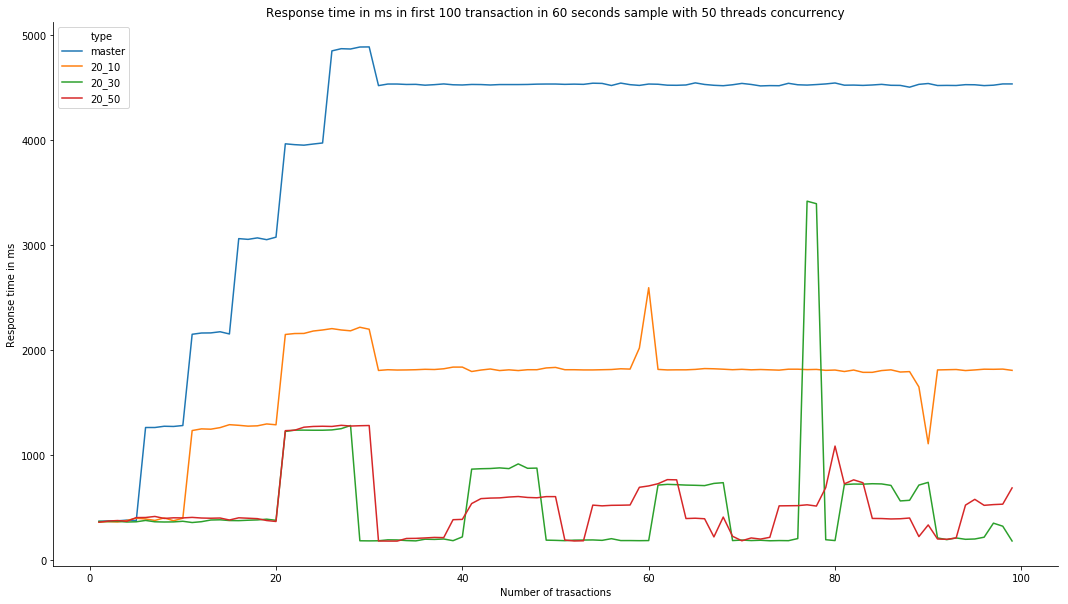

In [97]:
type_list = ['20_10','20_20','20_30','20_50', 'master']
dataset_30 = dataset_engine[dataset_engine['type'].isin(type_list)][dataset_engine['threads']==30][dataset_engine['number']<100]
dataset_30["elapsed"] = dataset_30["elapsed"].apply(lambda x: x - 900)
plt.figure(figsize=(18,10))
seaborn.lineplot(data=dataset_30, x='number', y='elapsed', hue='type')
plt.title('Response time in ms in first 100 transaction in 60 seconds sample with 50 threads concurrency')
plt.xlabel('Number of trasactions')
plt.ylabel('Response time in ms')
seaborn.despine()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


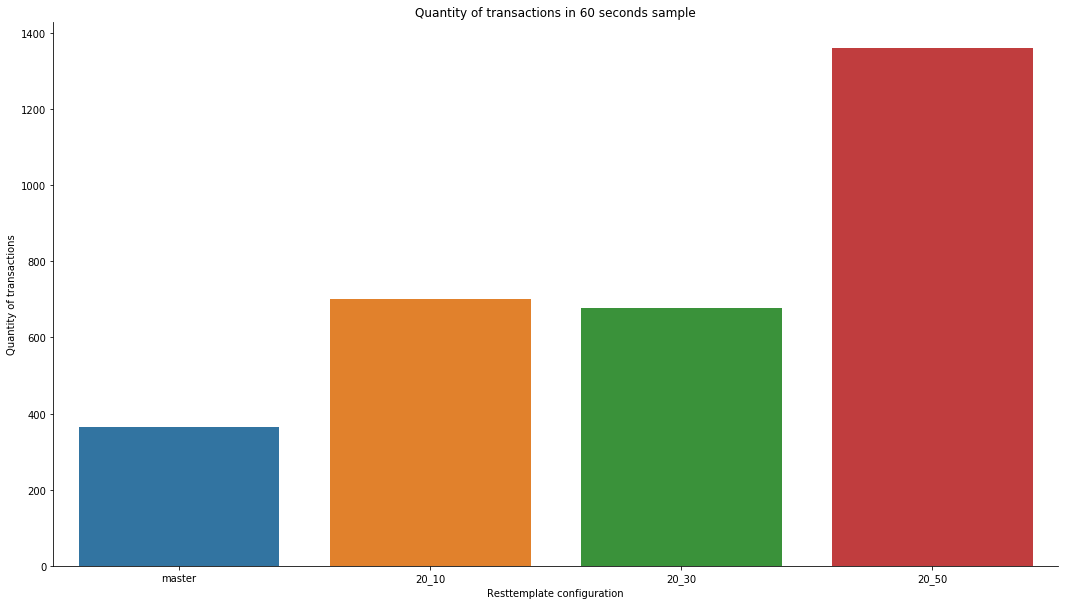

In [98]:
type_list = ['20_10','20_20','20_30','20_50', 'master']
dataset_30 = dataset_engine[dataset_engine['type'].isin(type_list)][dataset_engine['threads']==30]
dataset_30["elapsed"] = dataset_30["elapsed"].apply(lambda x: x - 900)
plt.figure(figsize=(18,10))
seaborn.countplot(data=dataset_30, x='type')
plt.title('Quantity of transactions in 60 seconds sample')
plt.xlabel('Resttemplate configuration')
plt.ylabel('Quantity of transactions')
seaborn.despine()

---
###PoolingHttpClientConnectionManager configuration:
* MaxTotal:  Variable
* DefaultMaxPerRoute: 10

---

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


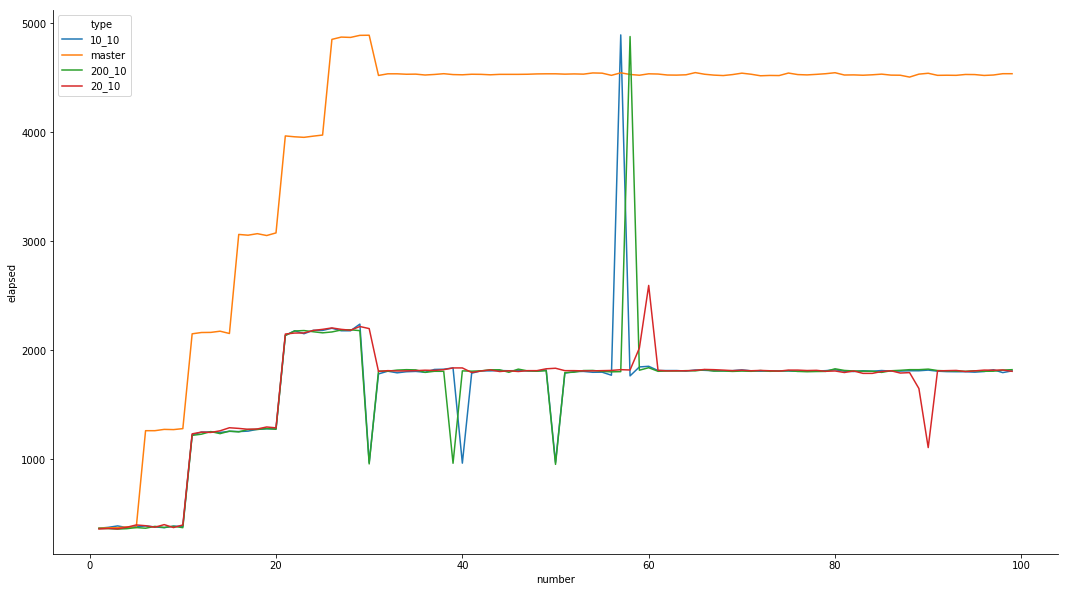

In [99]:
type_list = ['10_10','200_10', '20_10', 'master']
dataset_30 = dataset_engine[dataset_engine['type'].isin(type_list)][dataset_engine['threads']==30][dataset_engine['number']<100]
dataset_30["elapsed"] = dataset_30["elapsed"].apply(lambda x: x - 900)
plt.figure(figsize=(18,10))
seaborn.lineplot(data=dataset_30, x='number', y='elapsed', hue='type')
seaborn.despine()

## Heap Memory variation test



---

In the following graph it is shown the comparisson of the performance of engine in a load test in dev enviroment. The load test is for 60 seconds using rest template.  The load tests were done with different heap memory size: 64, 128, and 256. 

As conclusion the results showed no variation of engine performance with different heap memory size.

---



In [0]:
dataset_mem = pandas.read_csv('engine-mem.csv')

### 50 Threads concurrency

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


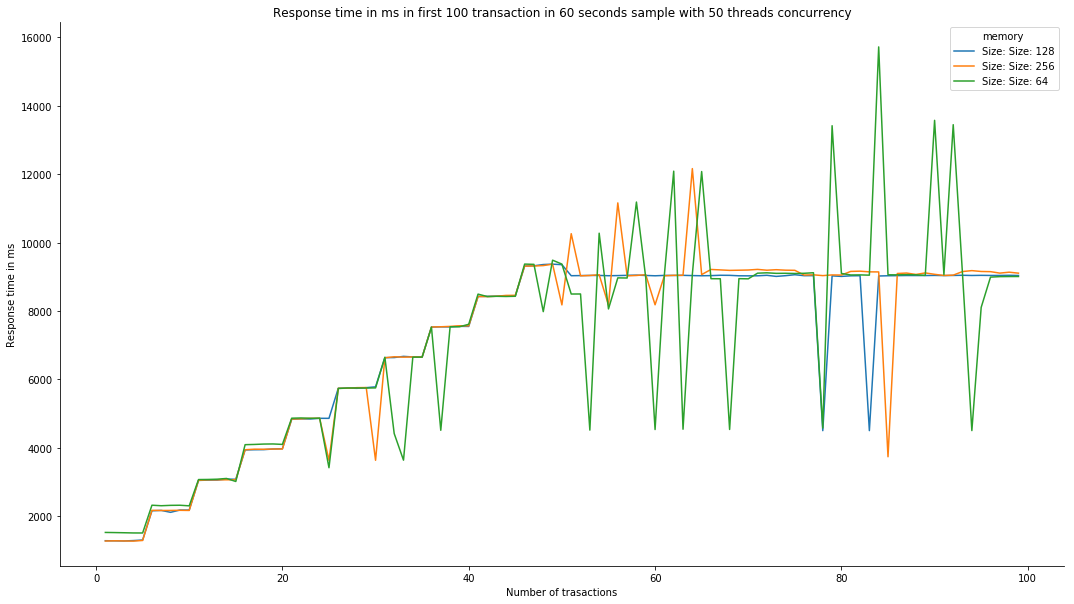

In [101]:
dataset_mem_50 = dataset_mem[dataset_mem['threads']==50][dataset_mem['number']<100]
plt.figure(figsize=(18,10))
dataset_mem_50["memory"]=dataset_mem_50["memory"].astype('str').apply(lambda x: 'Size: '+str(x))
dataset_mem_50=dataset_mem_50.groupby('memory').apply(lambda x: x.reset_index(drop = True))
dataset_mem_50["elapsed"] = dataset_mem_50["elapsed"].apply(lambda x: x - 900)

dataset_mem_50.dtypes
seaborn.lineplot(data=dataset_mem_50, x='number', y='elapsed', hue='memory')
plt.title('Response time in ms in first 100 transaction in 60 seconds sample with 50 threads concurrency')
plt.xlabel('Number of trasactions')
plt.ylabel('Response time in ms')
seaborn.despine()

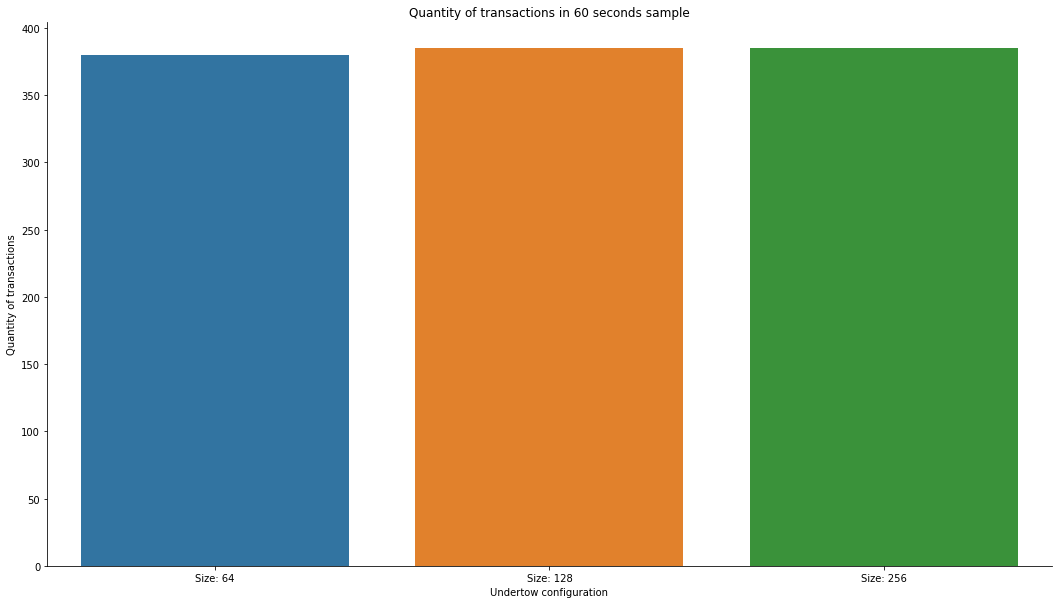

In [148]:
plt.figure(figsize=(18,10))
seaborn.countplot(data=dataset_mem[dataset_mem['threads']==50], x='memory')
plt.title('Quantity of transactions in 60 seconds sample')
plt.xlabel('Undertow configuration')
plt.ylabel('Quantity of transactions')
seaborn.despine()

### 20 Threads Concurrency


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


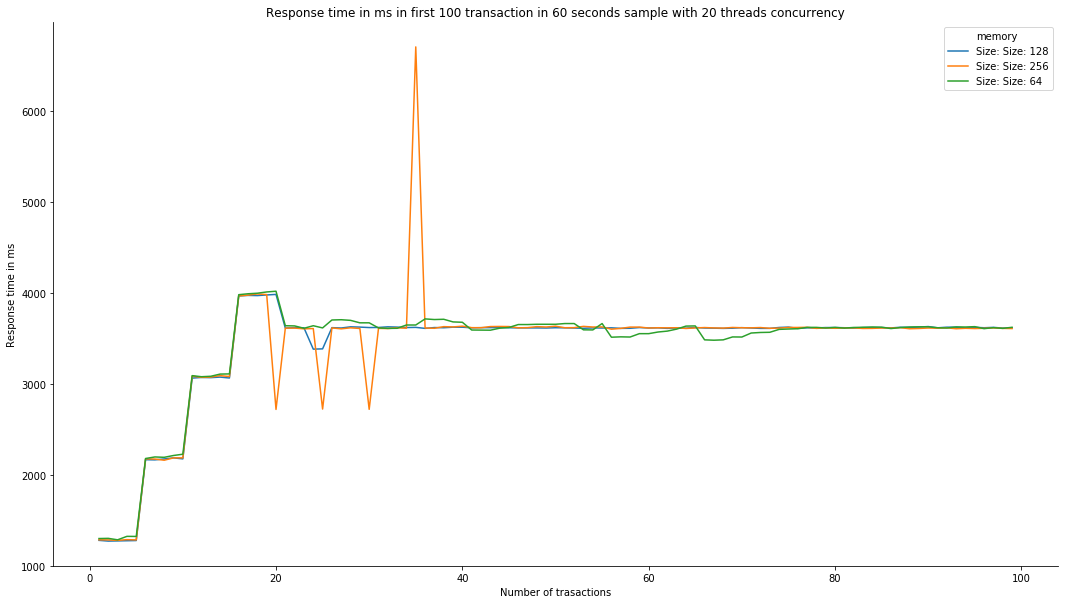

In [102]:
dataset_mem_20 = dataset_mem[dataset_mem['threads']==20][dataset_mem['number']<100]
plt.figure(figsize=(18,10))
dataset_mem_20["memory"]=dataset_mem_20["memory"].astype('str').apply(lambda x: 'Size: '+str(x))
dataset_mem_20=dataset_mem_20.groupby('memory').apply(lambda x: x.reset_index(drop = True))
dataset_mem_20["elapsed"] = dataset_mem_20["elapsed"].apply(lambda x: x - 900)

seaborn.lineplot(data=dataset_mem_20, x='number', y='elapsed', hue='memory')
plt.title('Response time in ms in first 100 transaction in 60 seconds sample with 20 threads concurrency')
plt.xlabel('Number of trasactions')
plt.ylabel('Response time in ms')
seaborn.despine()

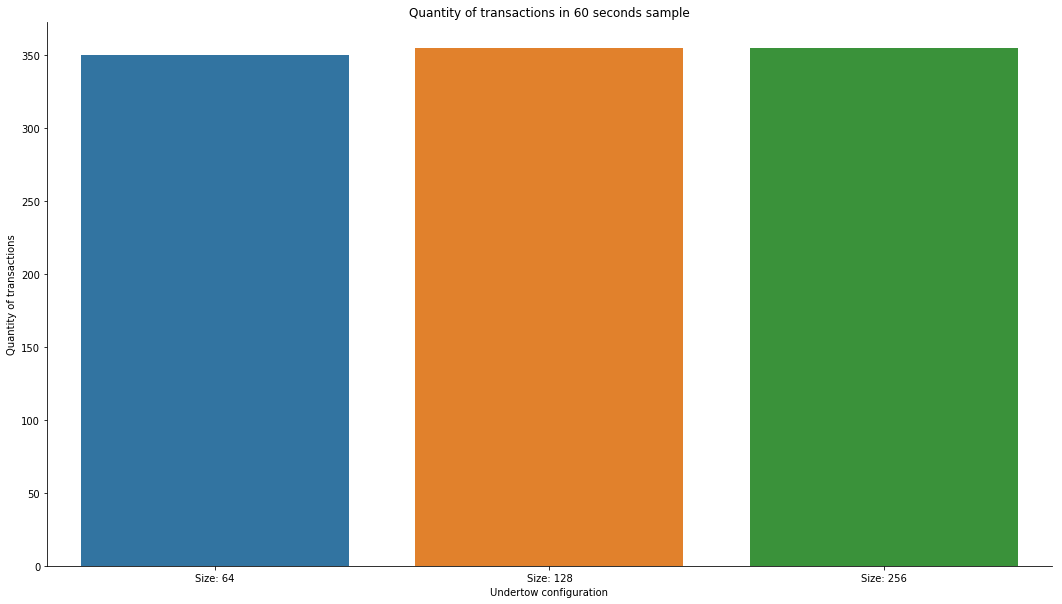

In [147]:
plt.figure(figsize=(18,10))
seaborn.countplot(data=dataset_mem[dataset_mem['threads']==20], x='memory')
plt.title('Quantity of transactions in 60 seconds sample')
plt.xlabel('Undertow configuration')
plt.ylabel('Quantity of transactions')
seaborn.despine()

## Undertow variation test

---
**4_32**

io-threads=4

task-max-threads=32   

---
**8_64**

io-threads=8

task-max-threads=64   

---
**16_128**

io-threads=16

task-max-threads=128   

---


### 20 Threads Concurrency with different Undertow Configuration

In [0]:
dataset_undertow = pandas.read_csv('engine_undertow.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


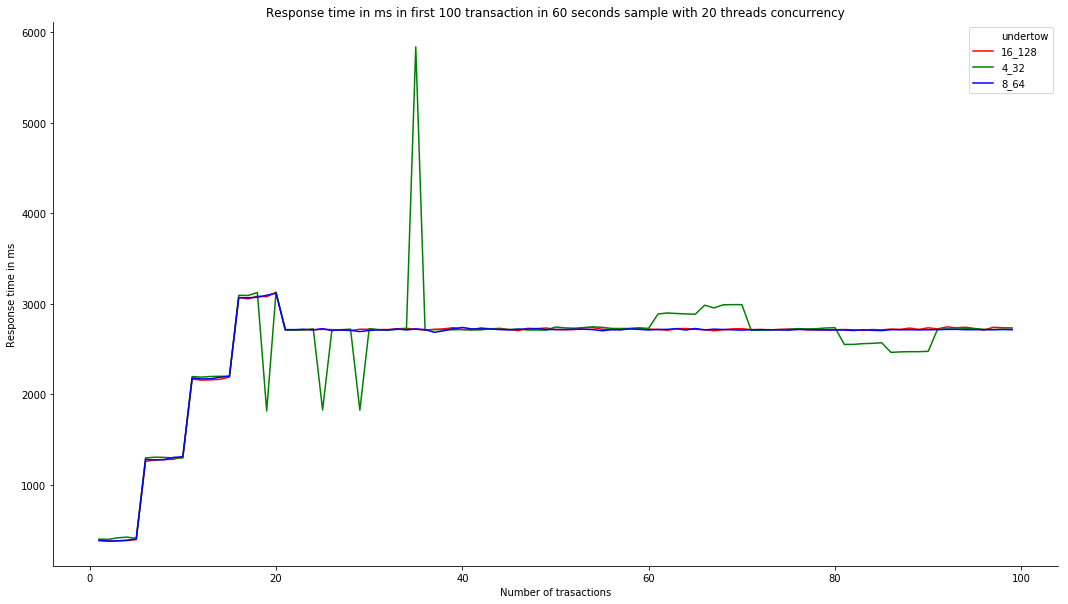

In [130]:
undertow_list = ['4_32','8_64', '16_128']
dataset_undertow_20 = dataset_undertow[dataset_undertow['threads']==20][dataset_undertow['number']<100][dataset_undertow['undertow'].isin(undertow_list)]
plt.figure(figsize=(18,10))
dataset_undertow_20["elapsed"] = dataset_undertow_20["elapsed"].apply(lambda x: x - 900)

seaborn.lineplot(data=dataset_undertow_20, x='number', y='elapsed', hue='undertow',palette=["r", "g","b"])
plt.title('Response time in ms in first 100 transaction in 60 seconds sample with 20 threads concurrency')
plt.xlabel('Number of trasactions')
plt.ylabel('Response time in ms')
seaborn.despine()

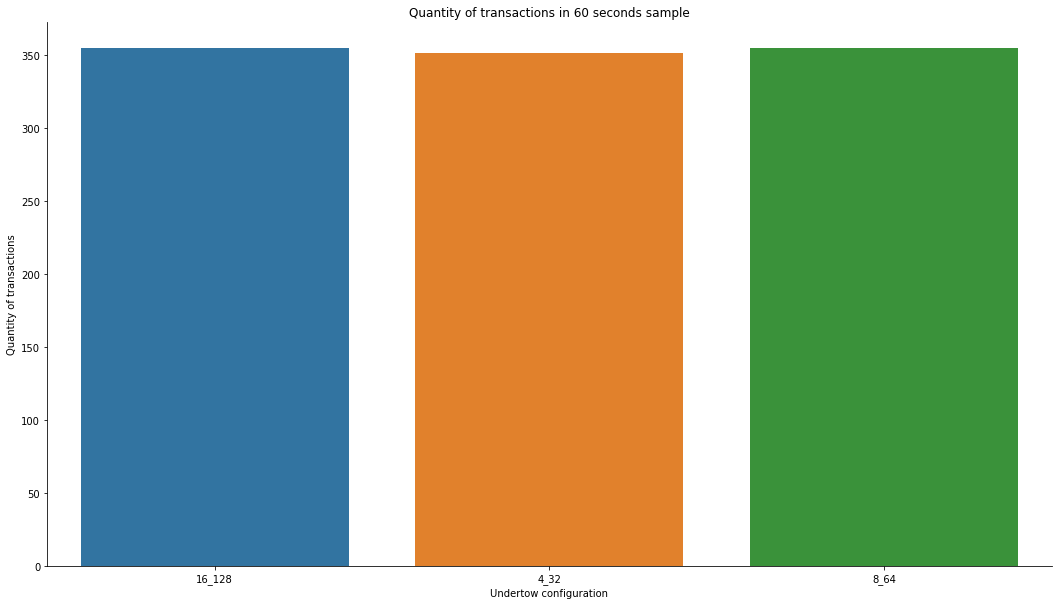

In [136]:
plt.figure(figsize=(18,10))
seaborn.countplot(data=dataset_undertow[dataset_undertow['threads']==20], x='undertow')
plt.title('Quantity of transactions in 60 seconds sample')
plt.xlabel('Undertow configuration')
plt.ylabel('Quantity of transactions')
seaborn.despine()

In [154]:
# percentile list 
perc =[.20, .40, .60, .80, .99] 
  
# calling describe method 
dataset_undertow[dataset_undertow['threads']==20].groupby('undertow').describe(percentiles = perc)[['elapsed']]

elapsed                                                           \
           count         mean         std     min     20%     40%     50%   
undertow                                                                    
16_128     355.0  3560.698592  333.624035  1278.0  3610.0  3613.0  3615.0   
4_32       352.0  3564.400568  380.572251  1296.0  3611.0  3615.0  3616.0   
8_64       355.0  3561.743662  341.074290  1277.0  3610.0  3613.0  3615.0   

                                           
             60%     80%      99%     max  
undertow                                   
16_128    3616.0  3624.0  3960.36  4027.0  
4_32      3619.0  3627.0  3991.98  6738.0  
8_64      3617.0  3624.0  4004.12  4281.0

### 50 Threads Concurrency with different Undertow Configuration

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


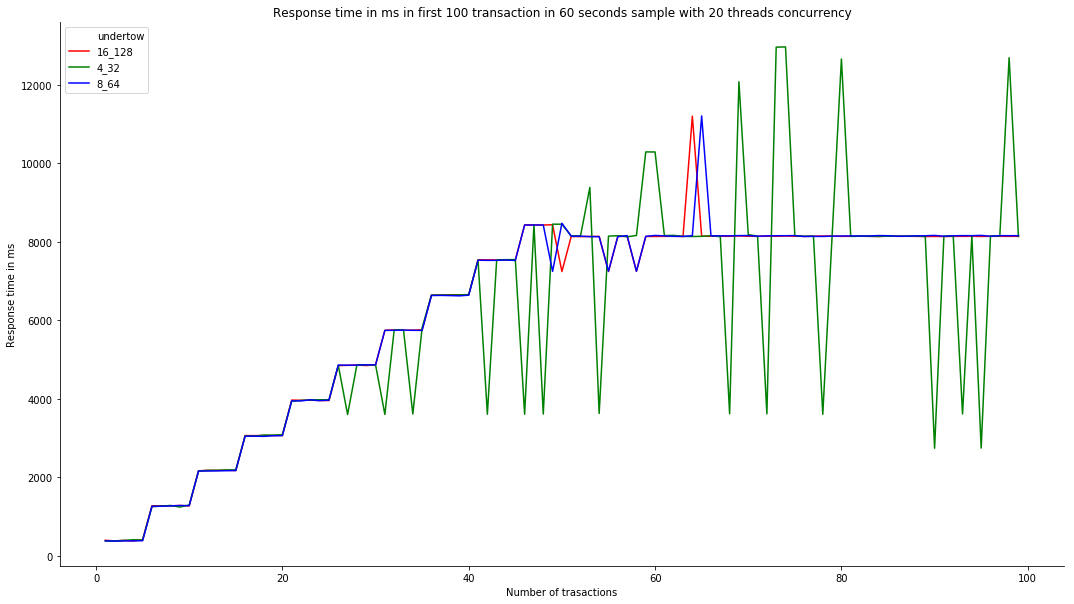

In [152]:
undertow_list = ['4_32','8_64', '16_128']
dataset_undertow_50 = dataset_undertow[dataset_undertow['threads']==50][dataset_undertow['number']<100][dataset_undertow['undertow'].isin(undertow_list)]
plt.figure(figsize=(18,10))
dataset_undertow_50["elapsed"] = dataset_undertow_50["elapsed"].apply(lambda x: x - 900)

seaborn.lineplot(data=dataset_undertow_50, x='number', y='elapsed', hue='undertow',palette=["r", "g","b"])
plt.title('Response time in ms in first 100 transaction in 60 seconds sample with 50 threads concurrency')
plt.xlabel('Number of trasactions')
plt.ylabel('Response time in ms')
seaborn.despine()

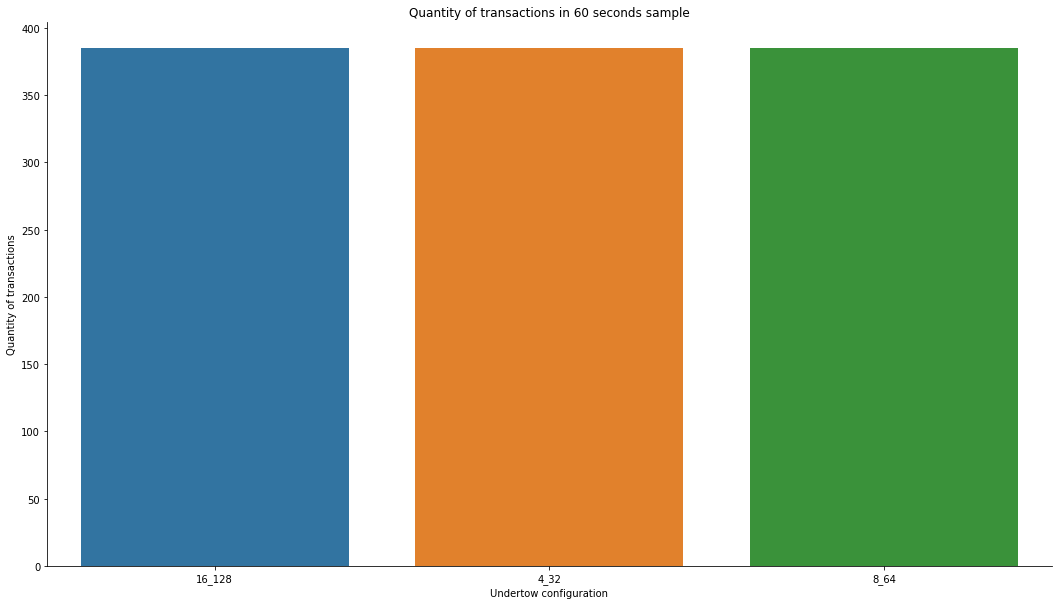

In [153]:
plt.figure(figsize=(18,10))
seaborn.countplot(data=dataset_undertow[dataset_undertow['threads']==50], x='undertow')
plt.title('Quantity of transactions in 60 seconds sample')
plt.xlabel('Undertow configuration')
plt.ylabel('Quantity of transactions')
seaborn.despine()

In [155]:
# percentile list 
perc =[.20, .40, .60, .80, .99] 
  
# calling describe method 
dataset_undertow[dataset_undertow['threads']==50].groupby('undertow').describe(percentiles = perc)[['elapsed']]

elapsed                                                            \
           count         mean          std     min     20%     40%     50%   
undertow                                                                     
16_128     385.0  8559.025974  1572.255944  1275.0  9025.0  9035.6  9039.0   
4_32       385.0  8563.789610  2476.911279  1275.0  8855.2  9038.6  9042.0   
8_64       385.0  8558.127273  1574.758932  1273.0  9029.0  9037.0  9040.0   

                                             
             60%     80%       99%      max  
undertow                                     
16_128    9044.0  9059.2   9329.32  12105.0  
4_32      9048.0  9077.2  14464.92  19015.0  
8_64      9043.0  9056.0   9329.16  12111.0